In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
import pytz
from dateutil.tz import tzutc
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### BotDataSet Class

We will use a class to load and build caculated columns.  This will allow us to reuse code when we look at traing and testing datasets.

In [2]:
exec(open("BotDataSet.py").read())

ds = BotDataSet()
ds.loadCSV('C:/data/2020-01-17.csv')
df = ds.df

In [3]:
pd.options.display.max_columns = None
display(df.head()) 
df.nunique()

,InboxID,Company,List,Campaign,RequestType,SendDate,RequestDate,Link,IPAddress,UserAgent,AS Name,AS Number,CIDR Range,UserID,DomainID,EmailDomain,EmailRootLevelDomain,CountryCode,RegionCode,PostalCode,Lat,Long,OlsonName,SendRequestSeconds,SendRequestSeconds_ln
0,{7C9E652E-AC29-02E0-BE9A-8C43363D665E},{0F96A485-3307-02C7-6F5F-C23BAF3CB945},{79575937-FEB1-AD59-92A5-F2BDCD8EBE25},{4ECAB404-363D-958D-4ECB-99B8D565A66E},Click,2020-01-16 11:32:00,2020-01-16 22:33:00,{CB7A65D9-3644-5395-6E60-E7A556F52E3A},{98302769-08A3-76D3-A660-FB0ED5A313CF},{1047A34C-F98E-2B84-9E69-BCBA6FEEDA97},Unknown,Unknown,{14392925-2BAF-FC72-0602-9DB674D6E74D},{C69692BD-C245-842F-7E3A-0BD44C2E52E8},{9DB20ACE-264D-4774-240E-A86A9FEBC3E6},{5236C5C5-F807-01B8-7308-6369971DE796},.au,AU,05,5000,NaN,NaN,Australia/Adelaide,39660,10.588167
1,{5C245764-B2E8-6C22-65DA-2FA633D2B83D},{30ADEAEA-4CB8-2254-1AD2-0D76721A3895},{D79E0F2C-4B46-F92F-513C-D9CB4D8150C6},{8708F19F-4880-FA0F-ECCC-0656BDE3B75C},Click,2020-01-17 00:51:00,2020-01-17 04:36:00,{3536BC26-72F7-93D0-09EF-2BF0D5BF5C56},{F879CD11-C8A8-E0F2-A6CF-FFD517892C2D},{67293EF8-7DAD-4A39-0C54-A4499B81C1B0},Unknown,Unknown,{14392925-2BAF-FC72-0602-9DB674D6E74D},{D2D2EECD-86A8-F45B-58AF-ED5ECF0025B6},{7C1BFAEE-63CC-62EB-7343-BB54BBB09F34},{8BBE6FB8-C8D7-CFA8-BF17-AD7BAE195985},.com,AU,05,5000,NaN,NaN,Australia/Adelaide,13500,9.510646
2,{8AB62ABA-0FFD-E217-7EBD-8AD7ECC87559},{30ADEAEA-4CB8-2254-1AD2-0D76721A3895},{E46FC402-5D7C-CB5B-0341-30AC5C9E30C6},{2DFC70F3-E099-652B-A336-E7A215899841},Click,2020-01-16 08:49:00,2020-01-16 19:50:00,{980DC05A-AA27-25B7-7E63-71E70A813088},{7B8A27E6-F6AB-6573-BEF3-334E2E442EF5},{4B0814A1-D331-7033-76B6-F8DB28419C4E},Unknown,Unknown,{14392925-2BAF-FC72-0602-9DB674D6E74D},{07C40EB6-8768-1646-A917-110882272065},{7C1BFAEE-63CC-62EB-7343-BB54BBB09F34},{8BBE6FB8-C8D7-CFA8-BF17-AD7BAE195985},.com,AU,05,5000,NaN,NaN,Australia/Adelaide,39660,10.588167
3,{4DE4BB44-5B00-C6E0-3164-C861E43F0C62},{30ADEAEA-4CB8-2254-1AD2-0D76721A3895},{E46FC402-5D7C-CB5B-0341-30AC5C9E30C6},{ED6C0505-90EC-C31C-3A6A-70A4A193A848},Click,2020-01-16 09:03:00,2020-01-16 17:27:00,{22792626-F2A9-D1AF-AB10-413C1F949A6A},{AF6309B4-2BB3-A707-2F53-131B8DC1D6A4},{F87DC183-2EAD-5AED-B536-4545C440750D},Unknown,Unknown,{14392925-2BAF-FC72-0602-9DB674D6E74D},{59591E4C-6446-5D8C-B4BB-FE284BEC8716},{355469F6-693A-48D0-ACF7-772342C94F4E},{E1EB2A3A-3A96-7B63-669B-7BF029316F88},.com,AU,08,6000,NaN,NaN,Australia/Perth,30240,10.317011
4,{ECB3FB8D-CBA3-8EB3-B97A-88C776102D97},{30ADEAEA-4CB8-2254-1AD2-0D76721A3895},{E46FC402-5D7C-CB5B-0341-30AC5C9E30C6},{2DFC70F3-E099-652B-A336-E7A215899841},Click,2020-01-16 08:48:00,2020-01-16 21:13:00,{93D6CA84-1DFF-2FC5-A0B1-FAB6DE900639},{BB083DCF-AABB-3B20-FB03-6F9DD69BABBE},{F87DC183-2EAD-5AED-B536-4545C440750D},Unknown,Unknown,{14392925-2BAF-FC72-0602-9DB674D6E74D},{ED8E3431-6480-D006-1DFC-4F1BFE952B03},{D75C365A-E14F-D786-8B90-F5AE2456FC87},{FED8E0A7-B13C-C044-F0EB-67C14E5F143D},.com,AU,08,6000,NaN,NaN,Australia/Perth,44700,10.707790


InboxID                  60675
Company                     27
List                        94
Campaign                  1033
RequestType                  1
SendDate                  5411
RequestDate               1441
Link                      5678
IPAddress                55248
UserAgent                 3917
AS Name                     24
AS Number                   25
CIDR Range                 908
UserID                   56880
DomainID                  5581
EmailDomain               5581
EmailRootLevelDomain        90
CountryCode                182
RegionCode                 202
PostalCode                7513
Lat                       4016
Long                      4195
OlsonName                  146
SendRequestSeconds        9018
SendRequestSeconds_ln     9018
dtype: int64

# Only One Metrizable Column in Raw Request Data
## This shows a large percent of clicks occur within seconds of the send

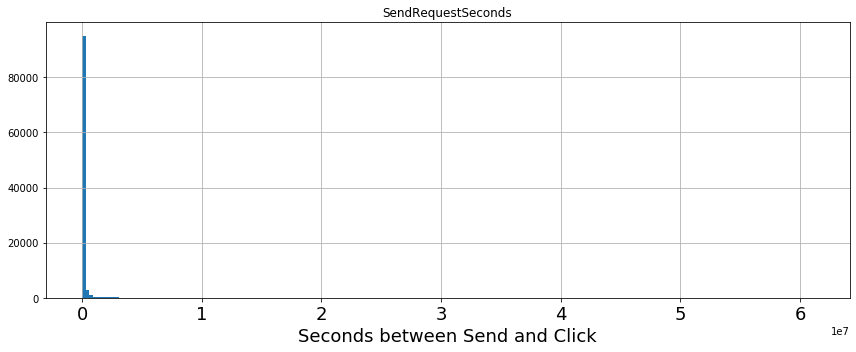

In [4]:
df.hist(column='SendRequestSeconds', bins=200, figsize=(12,5), xlabelsize=18)
plt.xlabel("Seconds between Send and Click", fontsize=18)
plt.tight_layout()
plt.show()

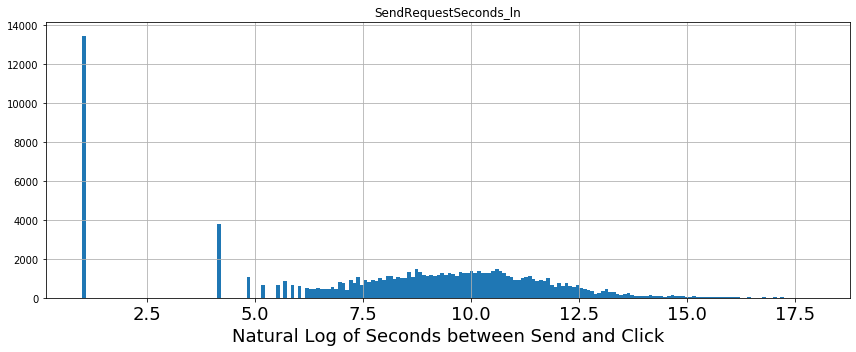

In [5]:
df.hist(column='SendRequestSeconds_ln', bins=200, figsize=(12,5), xlabelsize=18)
plt.xlabel("Natural Log of Seconds between Send and Click", fontsize=18)
plt.tight_layout()
plt.show()

## Extend Dataframe with Session Columns

In [6]:
max_session_time_gap = timedelta(seconds=120)

session_columns = {'InboxID':'InboxSessionID',
                   'IPAddress':'IPSessionID', 
                   'CIDR Range':'CIDRSessionID', 
                   'AS Number':'ASNSessionID' }

for t in session_columns.items():
    ds.loadSessionColumn(t, max_session_time_gap)

df = ds.df

In [7]:
display_columns = ['RequestDate', 'InboxID', 'IPAddress', 'CIDR Range', 'AS Number']
display_columns.extend(list(session_columns.values()))

sdf = df[display_columns]
display(sdf.head()) 
sdf.nunique()

,RequestDate,InboxID,IPAddress,CIDR Range,AS Number,InboxSessionID,IPSessionID,CIDRSessionID,ASNSessionID
37995,2020-01-16 09:00:00,{582CF80F-649D-3184-ECE6-6EC82905B7CA},{64386B36-2523-58A3-518D-168C6A876DDA},{14392925-2BAF-FC72-0602-9DB674D6E74D},Unknown,-4976648590324041512,-4359635365884096558,2536549716163010157,-981395858123264549
54165,2020-01-16 09:00:00,{0C6B4F07-832A-DB0C-7DF4-254161122219},{33B7B276-B6FB-429F-3BD4-C5F7FADC863F},{14392925-2BAF-FC72-0602-9DB674D6E74D},Unknown,-4956929465188783231,313583122831329508,2536549716163010157,-981395858123264549
2799,2020-01-16 09:00:00,{22D22920-6999-06CC-BAB0-2D366265EF7B},{FC769473-A337-122F-7580-81E139311D2B},{51238901-B830-DFDC-66A9-8DBC82A519E2},20057,-4300980463332759034,1003698865824547450,5704396238519649391,1100096472986236336
54801,2020-01-16 09:00:00,{8BC6F258-7FE3-3BD4-EA74-9B6B28FCA4BA},{DD2EF9AE-335E-A4B2-02AD-27993F36E16A},{1F836AD9-A858-453C-6AD0-EB853FA738D9},3356,601968359537052196,7382195566775027106,-4485893509764427600,-5155894151987759895
54817,2020-01-16 09:00:00,{E94DA0FE-E02B-AC56-A897-490942E7D2E3},{6771E305-765F-D3C6-57D5-357FEB3E4732},{1F836AD9-A858-453C-6AD0-EB853FA738D9},3356,-727943232056963751,-1617196086038794428,-4485893509764427600,-5155894151987759895


RequestDate        1441
InboxID           60675
IPAddress         55248
CIDR Range          908
AS Number            25
InboxSessionID    68089
IPSessionID       69008
CIDRSessionID      8098
ASNSessionID       1798
dtype: int64

## IP Based Session DataFrames

In [8]:
df_IPSession = df.groupby(['IPSessionID']).agg({
                                                   'IPSessionID':'count',
                                                   'IPAddress':'min',
                                                   'InboxID':'nunique', 
                                                   'UserID':'nunique', 
                                                   'EmailDomain':'nunique', 
                                                   'EmailRootLevelDomain':'nunique',
                                                   'Link':'nunique',
                                                   'SendRequestSeconds':'mean', 
                                                   'SendRequestSeconds_ln' : 'mean',
                                                   'RequestDate':lambda x: (x.max() - x.min()).seconds
                                                    })
df_IPSession.rename(columns={"IPSessionID": "ReqeustCount", 
                         "InboxID": "UniqueInboxIDs", 
                         "UserID": "UniqueEmails", 
                         "EmailDomain": "UniqueEmailDomains", 
                         "EmailRootLevelDomain": "UniqueEmailRootLevelDomain", 
                         "Link": "UniqueLinks",  
                         "SendRequestSeconds": "MeanSendRequestSeconds", 
                         "SendRequestSeconds_ln": "MeanSendRequestSeconds_ln", 
                         "RequestDate": "SessionDuration"}, 
                inplace=True)
# df_IPSession.sort_values(['UniqueInboxIDs'], ascending=False, inplace=True)
# display(df_IPSession.head(10)) 

# K Means on IP GroupBy DataFrames

## IP Session

In [9]:
agg_columns = ['ReqeustCount',
               'UniqueInboxIDs',
               'UniqueEmails',
               #'UniqueEmailDomains',
               'UniqueEmailRootLevelDomain',
               'UniqueLinks',
               #'MeanSendRequestSeconds',
               'MeanSendRequestSeconds_ln',
               'SessionDuration']



# Make sure the reduced columns is it's own df is not a view
df_IPSession_agg = df_IPSession[agg_columns].copy()

# Index is 'IPSessionID' which we will use to map back to our origional DataFrame so we can append the KMeanLables we find
print(df_IPSession_agg.index.name)

IPSessionID


## Start K-Means

### Scaler
Here we picked the MinMax Scaler to normalize our aggregate columns.
Note: SendRequestSeconds's PDF is an expoential decay curve.  Since we already have the natual log of column, the min max scaler should still be a good fit.

In [10]:
mms = MinMaxScaler()
mms.fit(df_IPSession_agg)
df_IPSession_transformed = pd.DataFrame(mms.transform(df_IPSession_agg))
df_IPSession_transformed.columns = agg_columns
df_IPSession_transformed.index = df_IPSession_agg.index

# Index is 'IPSessionID' which we will use to map back to our origional DataFrame so we can append the KMeanLables we find
print(df_IPSession_transformed.index.name)

IPSessionID


### Find # of Clusters to use in the Model
Find the best guess at to the number of clusters to use to ploting sq mean distances of the clusters as we walk the cluster count from 1 to 15

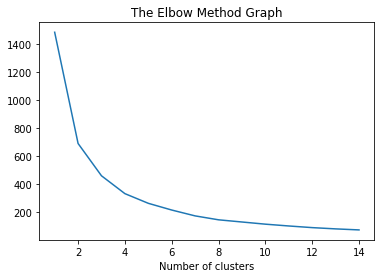

In [11]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_IPSession_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(range(1,15),Sum_of_squared_distances)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.show()

#### We see a change in slope around 4

But there is not an obvious elbow, so we could have picked 2 or 3

### Instantiate the KMeans class with clusters = 4
Run fit and get the ndarray of the predicted lables

We will use this array to append a new series onto existing DataFrames

In [12]:
model = KMeans(n_clusters=4)
model.fit(df_IPSession_transformed)
labels = model.predict(df_IPSession_transformed)

print(labels[:20])

[1 3 0 1 0 3 3 2 0 0 1 3 1 1 3 3 1 1 1 3 0 3 3 0 3 3 3 1 3 3 3 1 0 0 3 1 3
 3 3 3 1 3 3 0 0 1 3 1 3 3 3 1 0 0 1 3 3 3 3 0 1 3 0 0 0 1 3 2 3 3 3 1 1 3
 3 2 0 1 3 1]


#### Make sure the indexes and cardinality of the DataFrames and K-Means lables are a match

In [13]:
print("\
Index of transformed = {}\n\
Index of agg = {}"
      .format( 
              df_IPSession_transformed.index.name, 
              df_IPSession_agg.index.name
             ))

print("\
Len of transformed = {}\n\
Len of agg = {}\n\
Len of lables = {}"
      .format( 
              len(df_IPSession_transformed), 
              len(df_IPSession_agg), 
              len(labels)
              ))

Index of transformed = IPSessionID
Index of agg = IPSessionID
Len of transformed = 69008
Len of agg = 69008
Len of lables = 69008


## Merge KMean Lables for the IP GroupBy back into the 2 DataFrames

In [14]:
df_IPSession_transformed['IP_KMean'] = labels
df_IPSession_agg['IP_KMean'] = labels

## Show custering results in pair plot

#### Split pair plots into 2 for better visibility

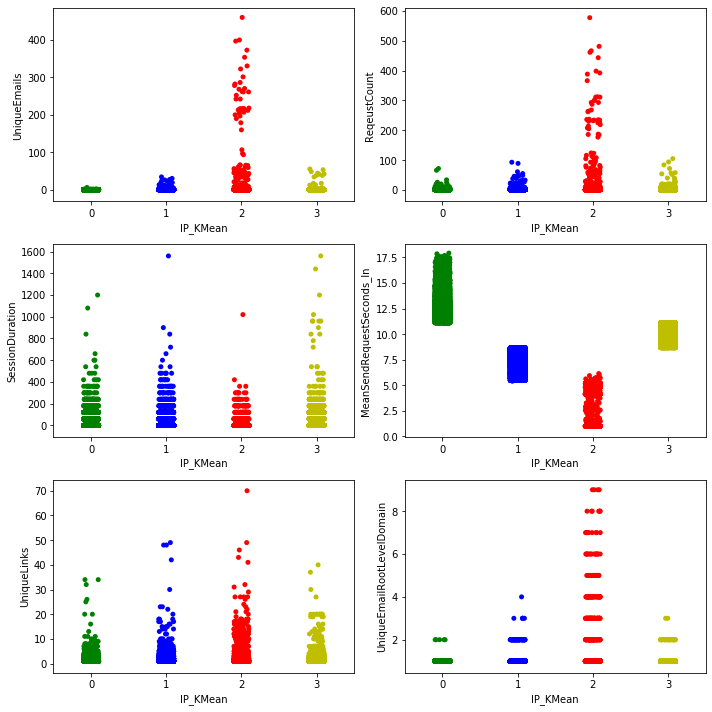

In [15]:
palette = {0:'g', 1:'b',2:'r', 3:'y'}
f = plt.figure(figsize=(10, 10))
gs = f.add_gridspec(3, 2)

ax = f.add_subplot(gs[0, 0])
sns.stripplot(x='IP_KMean', y='UniqueEmails', palette=palette, data=df_IPSession_agg)

ax = f.add_subplot(gs[0, 1])
sns.stripplot(x='IP_KMean', y='ReqeustCount', palette=palette, data=df_IPSession_agg)

ax = f.add_subplot(gs[1, 0])
sns.stripplot(x='IP_KMean', y='SessionDuration', palette=palette, data=df_IPSession_agg)

ax = f.add_subplot(gs[1, 1])
sns.stripplot(x='IP_KMean', y='MeanSendRequestSeconds_ln', palette=palette, data=df_IPSession_agg)

ax = f.add_subplot(gs[2, 0])
sns.stripplot(x='IP_KMean', y='UniqueLinks', palette=palette, data=df_IPSession_agg)

ax = f.add_subplot(gs[2, 1])
sns.stripplot(x='IP_KMean', y='UniqueEmailRootLevelDomain', palette=palette, data=df_IPSession_agg)

f.tight_layout()
plt.show()

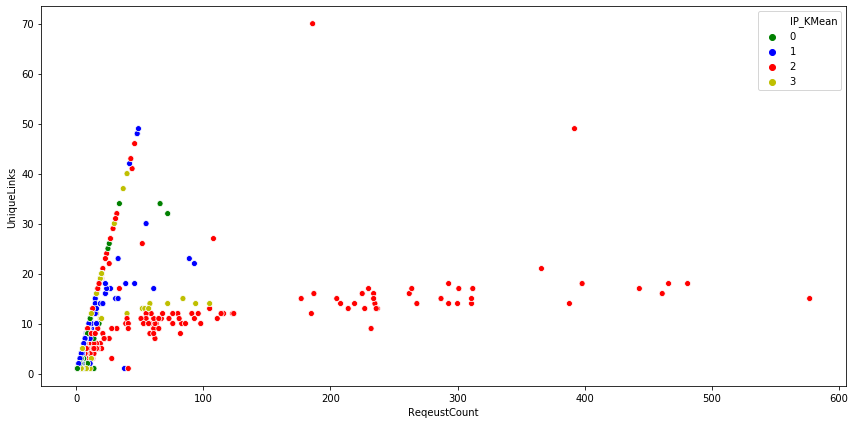

In [22]:
f = plt.figure(figsize=(12, 6))
sns.scatterplot(y='UniqueLinks', x='ReqeustCount', hue='IP_KMean', palette=palette, data=df_IPSession_agg)
f.tight_layout()
plt.show()

In [23]:
#todo: np.seterr(divide='ignore', invalid='ignore')
# Find out what the warnning is about.  i.e. More cleanup on MeanSendRequestSeconds_ln
np.seterr(divide='ignore', invalid='ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

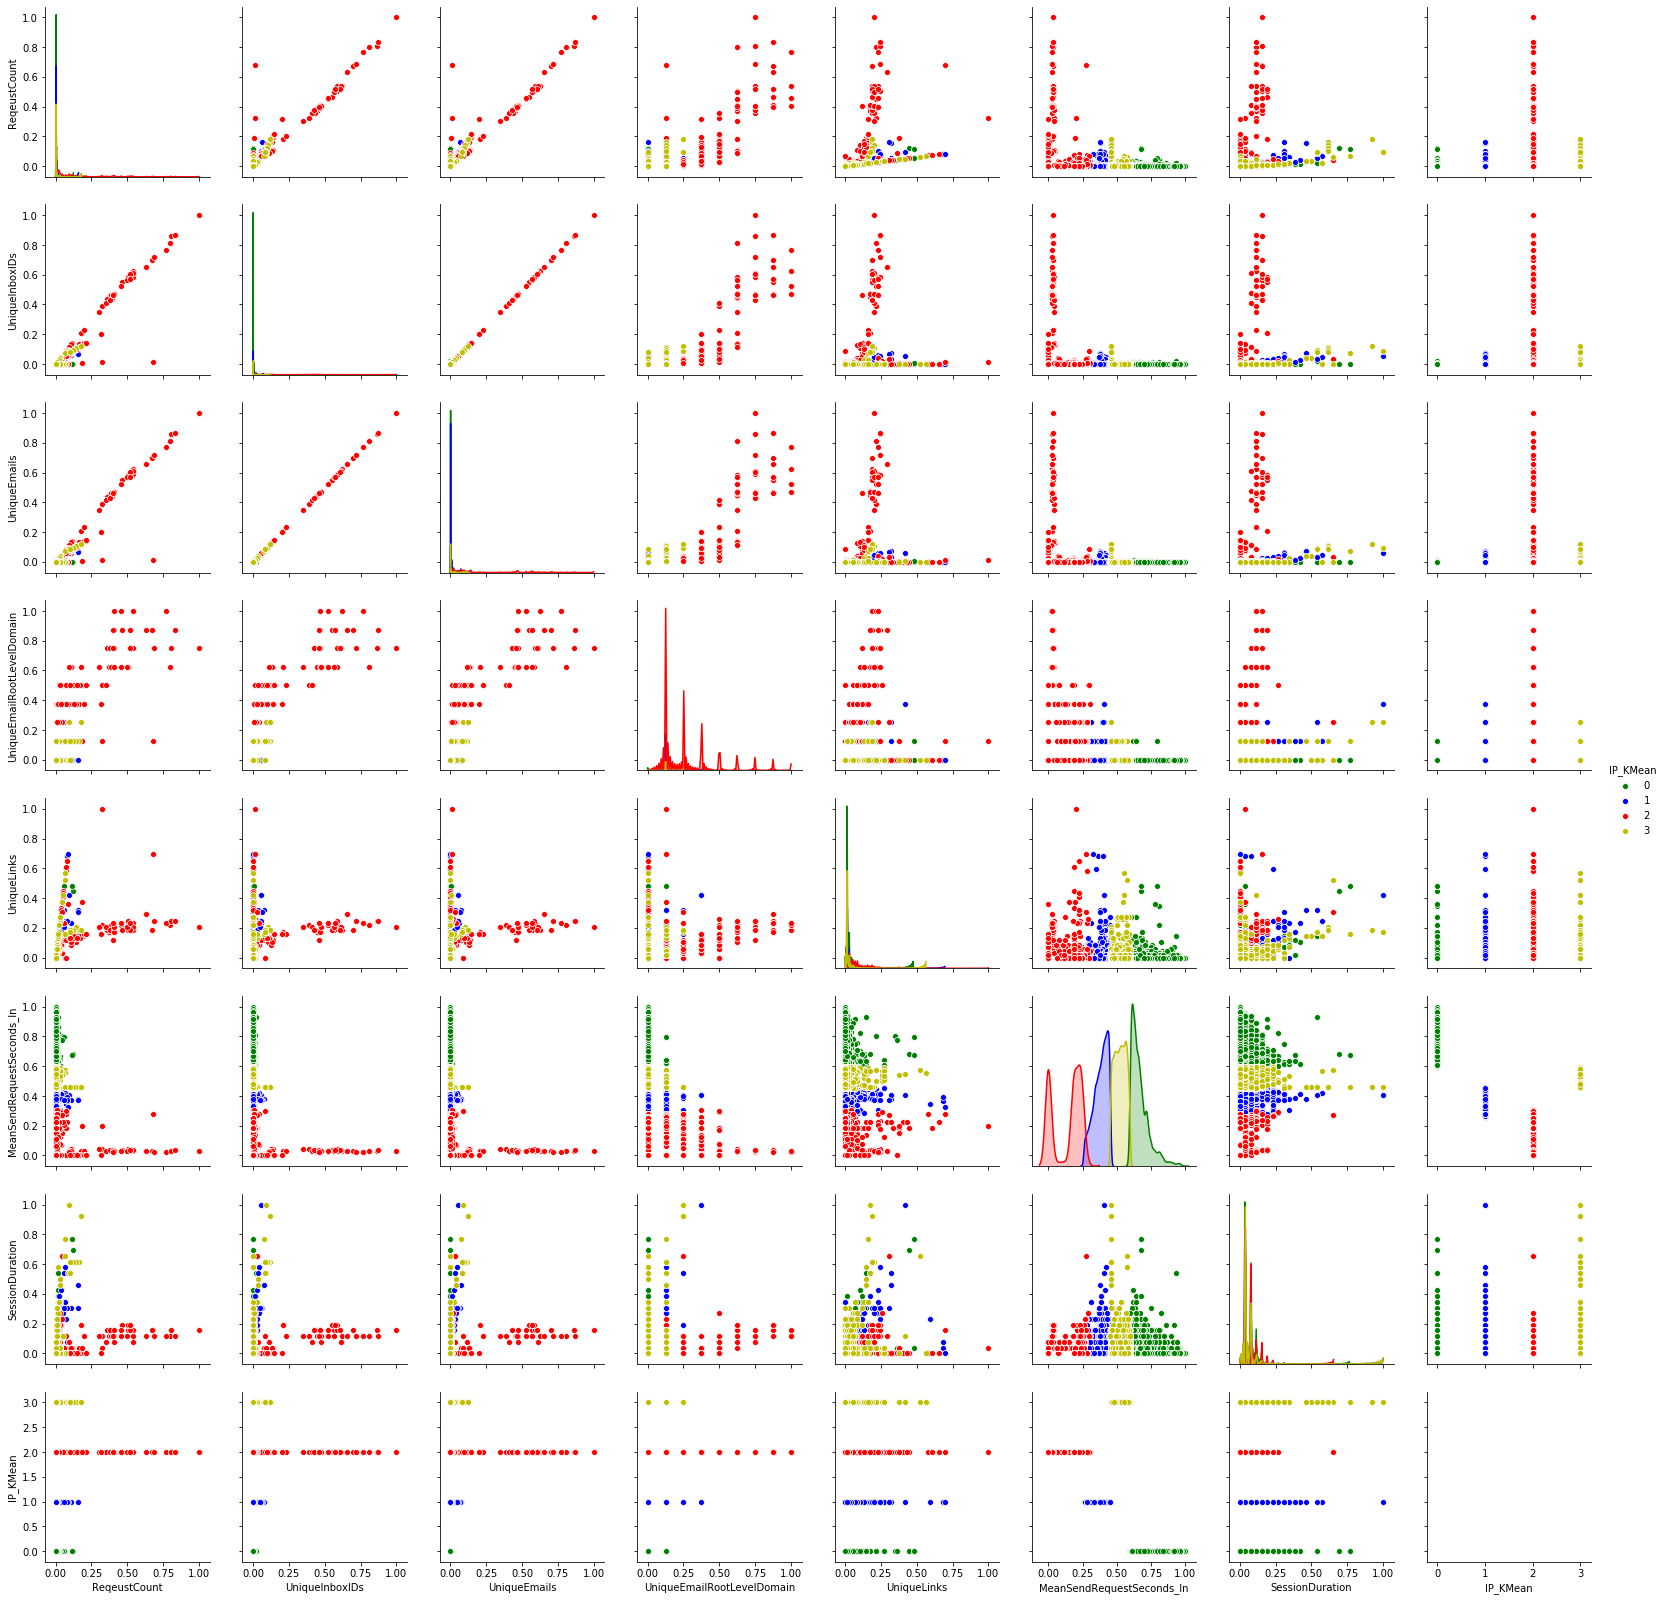

In [24]:

sns.pairplot(df_IPSession_transformed, hue="IP_KMean", height=2.8, palette=palette)

# Merge the K-Means labels for IP GroupBy with original df

In [25]:
df_IPKMeans = pd.merge(df, df_IPSession_agg['IP_KMean'], on="IPSessionID")

## Show distribution of these labels across the AS Names

In [26]:
g = df_IPKMeans.groupby(['IP_KMean', 'AS Name'])['AS Name'].count()
g = pd.DataFrame(g)
g.columns = ['Count']
g.sort_values('Count', ascending=False)
g.reset_index('IP_KMean', inplace=True)
g.pivot(columns='IP_KMean', values='Count')

IP_KMean,0,1,2,3
AS Name,,,,
AT&T Mobility LLC,1497.0,1677.0,119.0,2702.0
"Amazon.com, Inc.",284.0,1743.0,16635.0,1587.0
Cellco Partnership DBA Verizon Wireless,5.0,7.0,NaN,16.0
"CenturyLink Communications, LLC",197.0,208.0,17.0,410.0
Cogent Communications,7.0,47.0,5.0,34.0
"Comcast Cable Communications, LLC",107.0,224.0,29.0,213.0
"DigitalOcean, LLC",8.0,65.0,67.0,8.0
DoD Network Information Center,6.0,9.0,1.0,7.0
GENESCO INC,17.0,14.0,NaN,3.0


In [27]:
g = df_IPKMeans.groupby(['IP_KMean', 'CIDR Range'])['CIDR Range'].count()
g = pd.DataFrame(g)
g.columns = ['Count']
g.sort_values('Count', ascending=False)
g.reset_index('IP_KMean', inplace=True)
g.pivot(columns='IP_KMean', values='Count')

IP_KMean,0,1,2,3
CIDR Range,,,,
{0058501F-A1EF-AD3A-7EFB-B5F9DFAC837C},1.0,1.0,NaN,NaN
{00C99D31-0CF6-74AA-1380-B44F7FDAF2F2},5.0,5.0,NaN,4.0
{01535BEC-F4CD-5BBE-0EE9-9535FC04A1C0},5.0,NaN,NaN,4.0
{019B8901-6688-7A49-6C9B-AF66D4283A2B},1.0,NaN,1.0,1.0
{02DF93D1-830B-1904-F827-D411297AA773},16.0,3.0,2.0,NaN
...,...,...,...,...
{FD6D7A4A-B962-CE50-D33E-6EEE447E2B7B},NaN,NaN,NaN,2.0
{FDAC503D-53CB-3EAD-6A52-F8BF7B525F3B},1.0,10.0,NaN,6.0
{FDAE78FD-0823-6FFA-8682-1940302E60E9},18.0,12.0,1.0,41.0


In [28]:
df_IPKMeans

,InboxID,Company,List,Campaign,RequestType,SendDate,RequestDate,Link,IPAddress,UserAgent,AS Name,AS Number,CIDR Range,UserID,DomainID,EmailDomain,EmailRootLevelDomain,CountryCode,RegionCode,PostalCode,Lat,Long,OlsonName,SendRequestSeconds,SendRequestSeconds_ln,InboxSessionID,IPSessionID,CIDRSessionID,ASNSessionID,IP_KMean
0,{582CF80F-649D-3184-ECE6-6EC82905B7CA},{30ADEAEA-4CB8-2254-1AD2-0D76721A3895},{E46FC402-5D7C-CB5B-0341-30AC5C9E30C6},{2DFC70F3-E099-652B-A336-E7A215899841},Click,2020-01-16 08:48:00,2020-01-16 09:00:00,{6F54316F-90F6-D7DB-F849-FF38B2507100},{64386B36-2523-58A3-518D-168C6A876DDA},{525CA1C0-D81A-8150-057B-F4E020CEA2D5},Unknown,Unknown,{14392925-2BAF-FC72-0602-9DB674D6E74D},{760483EB-5DBF-EFF3-EB13-109FD84ACA98},{81ADDE0D-9AB5-FC9D-B4ED-DE1A5256587F},{68F1F17F-F779-4BA9-C916-BD41710E6088},.gov,US,AL,35801,34.74939,-86.595892,America/Chicago,720,6.583019,-4976648590324041512,-4359635365884096558,2536549716163010157,-981395858123264549,1
1,{0C6B4F07-832A-DB0C-7DF4-254161122219},{6DB3EAC4-FADA-1691-9FBA-655073370256},{7266EB3F-99A6-5A8E-79CA-14273D566363},{43D991E4-43D7-E76C-79A2-378E439938D9},Click,2020-01-16 06:05:00,2020-01-16 09:00:00,{06B6443C-3F17-CB35-31B1-3438AE55D255},{33B7B276-B6FB-429F-3BD4-C5F7FADC863F},{69C147F7-1D82-D128-DAA9-9B93B5FA778E},Unknown,Unknown,{14392925-2BAF-FC72-0602-9DB674D6E74D},{0BB28B17-3C9D-2661-E9EA-A268588544D6},{7C1BFAEE-63CC-62EB-7343-BB54BBB09F34},{8BBE6FB8-C8D7-CFA8-BF17-AD7BAE195985},.com,US,GA,30303,33.762106,-84.381526,America/New_York,10500,9.259389,-4956929465188783231,313583122831329508,2536549716163010157,-981395858123264549,3
2,{22D22920-6999-06CC-BAB0-2D366265EF7B},{6C357BE7-9D8A-9D1E-FD3C-9D4C45077541},{15D09884-3FDD-8390-8493-A428F11F308D},{E6B25FF0-B377-EB36-FA8B-8CE041306D07},Click,2020-01-12 13:11:00,2020-01-16 09:00:00,{EE88A852-E723-1850-B8F9-A21C3ECF6A2E},{FC769473-A337-122F-7580-81E139311D2B},{F87DC183-2EAD-5AED-B536-4545C440750D},AT&T Mobility LLC,20057,{51238901-B830-DFDC-66A9-8DBC82A519E2},{2CE1010C-CEC5-F4A2-3B17-FE2F786B1D4F},{7C1BFAEE-63CC-62EB-7343-BB54BBB09F34},{8BBE6FB8-C8D7-CFA8-BF17-AD7BAE195985},.com,US,AR,72255,34.757432,-92.654604,America/Chicago,330540,12.708491,-4300980463332759034,1003698865824547450,5704396238519649391,1100096472986236336,0
3,{92C63747-6820-2831-5563-D39C58B55CAB},{6C357BE7-9D8A-9D1E-FD3C-9D4C45077541},{15D09884-3FDD-8390-8493-A428F11F308D},{6C12FBC0-6D1B-DBB5-2ABC-17A479BCD748},Click,2020-01-15 09:07:00,2020-01-16 09:02:00,{5DCCCCC8-F1E7-A87E-73AC-750510C0A500},{FC769473-A337-122F-7580-81E139311D2B},{F87DC183-2EAD-5AED-B536-4545C440750D},AT&T Mobility LLC,20057,{51238901-B830-DFDC-66A9-8DBC82A519E2},{2CE1010C-CEC5-F4A2-3B17-FE2F786B1D4F},{7C1BFAEE-63CC-62EB-7343-BB54BBB09F34},{8BBE6FB8-C8D7-CFA8-BF17-AD7BAE195985},.com,US,AR,72255,34.757432,-92.654604,America/Chicago,86100,11.363296,2881975028516048081,1003698865824547450,5704396238519649391,1100096472986236336,0
4,{8BC6F258-7FE3-3BD4-EA74-9B6B28FCA4BA},{6C357BE7-9D8A-9D1E-FD3C-9D4C45077541},{6F94E4F5-6E70-650D-84CA-F23F48E450E1},{597FC39E-6597-EEDF-8CF1-1A7E2FAD6920},Click,2020-01-16 09:01:00,2020-01-16 09:00:00,{96AD234E-C9E4-926B-CA10-5BE12F7B52D3},{DD2EF9AE-335E-A4B2-02AD-27993F36E16A},{613F6166-E32A-4AE1-9FC4-7927349BDFE7},"Level 3 Parent, LLC",3356,{1F836AD9-A858-453C-6AD0-EB853FA738D9},{7ADB5874-C672-E4DD-20D5-128AFF13B513},{57E78DE8-E607-15CB-93AE-A4A7DCDE5C1F},{93804F98-8771-854B-C660-B2B0DDF18FA4},.com,US,NJ,07175,NaN,NaN,America/New_York,0,1.000000,601968359537052196,7382195566775027106,-4485893509764427600,-5155894151987759895,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101056,{3A9030BD-BD56-B9C3-51E2-6BD07687E95E},{E51E30F0-6E88-FECA-2DA5-E7ABD614FB26},{25801F3D-C7D4-5BB7-E5AE-DA0AB4E9427A},{9F7576DF-A511-7D73-FB98-5108E77D02C9},Click,2020-01-15 14:00:00,2020-01-17 09:00:00,{B6514AAE-415C-E04D-8F61-6D76C64A2F77},{2E34A2F6-8027-5764-816C-FBF21F8DCF7D},{7B607BC7-4DC0-DE1A-048A-0B6C